# Image processing with Keras: Convolutional Networks

Roughly based on the keras mnist-cnn example, but using the notmnist dataset.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# for making plots prettier
import seaborn as sns 
sns.set_style('white')

In [4]:
from __future__ import print_function
np.random.seed(1337)  # for reproducibility

In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
import notmnist
notmnist_path = "~/class/udacity-deep-learning/notMNIST.pickle"

In [7]:
from display import visualize_keras_model, plot_training_curves

In [8]:
batch_size = 128
nb_classes = 10
nb_epoch = 10

In [9]:
# the data, shuffled and split between train, validation, and test sets
(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = notmnist.load_data(notmnist_path)

In [12]:
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

Reshape inputs to be flat.
Convert labels to 1-hot encoding.

In [18]:
# Reshape to have an extra dimension (useless for our black&white images, useful for RGB)
x_train = x_train.reshape(-1, img_rows, img_cols, 1)
x_valid = x_valid.reshape(-1, img_rows, img_cols, 1)
x_test = x_test.reshape(-1, img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 28, 28, 1)
50000 train samples
10000 valid samples
10000 test samples


In [11]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Exercise: figure out the tensor sizes

What shape data goes through each layer? Predict the output of `model.summary()`

In [19]:
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 26, 26, 32)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 24, 24, 32)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 24, 24, 32)    0           convolution2d_4[0][0]            
___________________________________________________________________________________________

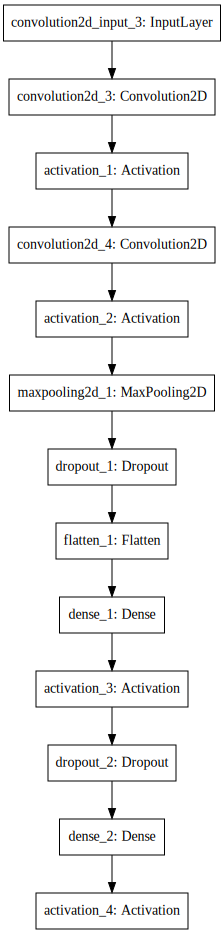

In [20]:
visualize_keras_model(model)

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 262s - loss: 0.7784 - acc: 0.7653 - val_loss: 0.4984 - val_acc: 0.8521
Epoch 2/10
50000/50000 [==============================] - 234s - loss: 0.5215 - acc: 0.8479 - val_loss: 0.4465 - val_acc: 0.8678
Epoch 3/10
50000/50000 [==============================] - 233s - loss: 0.4744 - acc: 0.8600 - val_loss: 0.4202 - val_acc: 0.8770
Epoch 4/10
50000/50000 [==============================] - 235s - loss: 0.4451 - acc: 0.8676 - val_loss: 0.4110 - val_acc: 0.8799
Epoch 5/10
50000/50000 [==============================] - 238s - loss: 0.4219 - acc: 0.8737 - val_loss: 0.3934 - val_acc: 0.8861
Epoch 6/10
50000/50000 [==============================] - 240s - loss: 0.4057 - acc: 0.8779 - val_loss: 0.3837 - val_acc: 0.8886
Epoch 7/10
50000/50000 [==============================] - 249s - loss: 0.3899 - acc: 0.8823 - val_loss: 0.3780 - val_acc: 0.8903
Epoch 8/10
50000/50000 [=======================

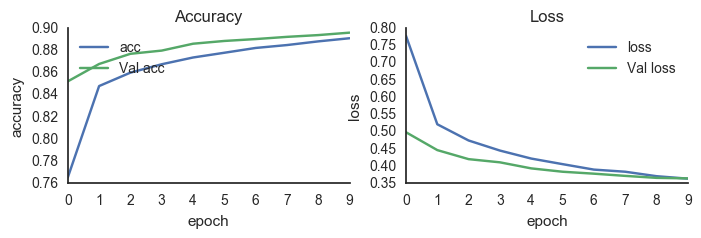

In [22]:
plot_training_curves(history.history);

We already have a better score than with our fully connected network, and both training and validation accuracy still going up. Let's train some more -- note that this model takes much longer to train -- about 10 times longer per epoch. 

In [23]:
history2 = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 246s - loss: 0.3560 - acc: 0.8922 - val_loss: 0.3575 - val_acc: 0.8966
Epoch 2/10
50000/50000 [==============================] - 208s - loss: 0.3448 - acc: 0.8960 - val_loss: 0.3578 - val_acc: 0.8969
Epoch 3/10
50000/50000 [==============================] - 208s - loss: 0.3409 - acc: 0.8955 - val_loss: 0.3550 - val_acc: 0.8978
Epoch 4/10
50000/50000 [==============================] - 218s - loss: 0.3333 - acc: 0.8987 - val_loss: 0.3534 - val_acc: 0.8998
Epoch 5/10
50000/50000 [==============================] - 215s - loss: 0.3284 - acc: 0.8999 - val_loss: 0.3483 - val_acc: 0.9007
Epoch 6/10
50000/50000 [==============================] - 221s - loss: 0.3207 - acc: 0.9013 - val_loss: 0.3507 - val_acc: 0.8992
Epoch 7/10
50000/50000 [==============================] - 222s - loss: 0.3158 - acc: 0.9030 - val_loss: 0.3514 - val_acc: 0.8985
Epoch 8/10
50000/50000 [=======================

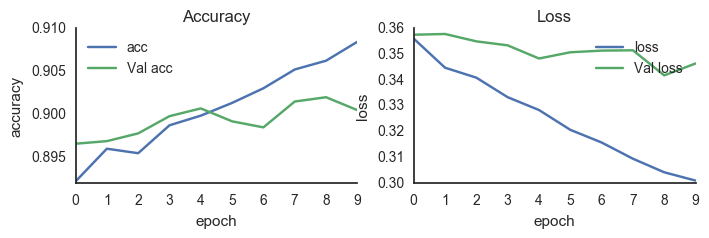

In [24]:
# TODO: merge old and new histories?
plot_training_curves(history2.history);

Training accuracy still going up a bit (note the different scale!), validation accuracy anymore starting to flatten out. Let's stop training here and look at the test score.

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.152381845251
Test accuracy: 0.9564


Well, we're getting 95.6% instead of 93.3% with our last fully connected network from before. This is still without any tuning. To that end, let's see if we can get better results by training longer on a smaller network: looking at the network summary above, we can see that most of the parameters of the network are in the dense layer. We might expect that reducing that layer's size, and thus the number of parameters to train will make it faster. Let's see:

In [ ]:
model2 = Sequential()

model2.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=pool_size))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(48))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))

In [28]:
model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 26, 26, 32)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 24, 24, 32)    9248        activation_9[0][0]               
____________________________________________________________________________________________________
activation_10 (Activation)       (None, 24, 24, 32)    0           convolution2d_8[0][0]            
___________________________________________________________________________________________

230K instead of 600K parameters. Does it train faster?

In [29]:
history = model2.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=3*nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 227s - loss: 0.9331 - acc: 0.7170 - val_loss: 0.5306 - val_acc: 0.8418
Epoch 2/30
50000/50000 [==============================] - 231s - loss: 0.6329 - acc: 0.8134 - val_loss: 0.4837 - val_acc: 0.8608
Epoch 3/30
50000/50000 [==============================] - 228s - loss: 0.5745 - acc: 0.8286 - val_loss: 0.4554 - val_acc: 0.8683
Epoch 4/30
50000/50000 [==============================] - 220s - loss: 0.5459 - acc: 0.8392 - val_loss: 0.4346 - val_acc: 0.8730
Epoch 5/30
50000/50000 [==============================] - 217s - loss: 0.5202 - acc: 0.8456 - val_loss: 0.4273 - val_acc: 0.8759
Epoch 6/30
50000/50000 [==============================] - 224s - loss: 0.5067 - acc: 0.8481 - val_loss: 0.4162 - val_acc: 0.8803
Epoch 7/30
50000/50000 [==============================] - 223s - loss: 0.4892 - acc: 0.8540 - val_loss: 0.4106 - val_acc: 0.8793
Epoch 8/30
50000/50000 [=======================

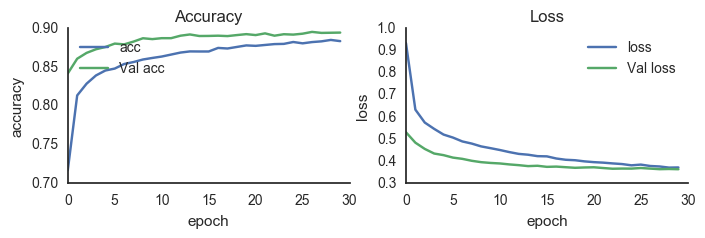

In [30]:
plot_training_curves(history.history);

Not much faster (surprising), and slightly worse performance (not surprising). Why not faster? The convolutions take a lot of time to compute: only a few parameters, but we use them a lot! e.g. For a 3x3 convolution kernel, we do 9 computations for each pixel (except around the edges). So, let's try again, now 

In [32]:
model3 = Sequential()


# 2x2 instead of 3x3, and 10 filters instead of 32
model3.add(Convolution2D(10, 2, 2,
                        border_mode='valid',
                        input_shape=input_shape))
# Adding a max-pool after the first convolution. Makes the second convolution half as big.
model3.add(MaxPooling2D(pool_size=pool_size))

# Leave the rest the same, still with just 48 hidden units in dense layer
model3.add(Activation('relu'))
model3.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=pool_size))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(48))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(nb_classes))
model3.add(Activation('softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 27, 27, 10)    50          convolution2d_input_7[0][0]      
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 13, 13, 10)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
activation_17 (Activation)       (None, 13, 13, 10)    0           maxpooling2d_6[0][0]             
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 11, 11, 32)    2912        activation_17[0][0]              
___________________________________________________________________________________________

Now much fewer parameters, smaller convolutions. Let's see how it does on training speed and accuracy:

In [33]:
history = model3.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=3*nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 56s - loss: 1.2907 - acc: 0.5729 - val_loss: 0.7722 - val_acc: 0.7647
Epoch 2/30
50000/50000 [==============================] - 53s - loss: 0.8898 - acc: 0.7184 - val_loss: 0.6803 - val_acc: 0.7899
Epoch 3/30
50000/50000 [==============================] - 74s - loss: 0.8234 - acc: 0.7393 - val_loss: 0.6480 - val_acc: 0.7991
Epoch 4/30
50000/50000 [==============================] - 51s - loss: 0.7901 - acc: 0.7527 - val_loss: 0.6251 - val_acc: 0.8059
Epoch 5/30
50000/50000 [==============================] - 43s - loss: 0.7602 - acc: 0.7618 - val_loss: 0.6077 - val_acc: 0.8107
Epoch 6/30
50000/50000 [==============================] - 39s - loss: 0.7375 - acc: 0.7671 - val_loss: 0.5898 - val_acc: 0.8168
Epoch 7/30
50000/50000 [==============================] - 41s - loss: 0.7208 - acc: 0.7761 - val_loss: 0.5795 - val_acc: 0.8200
Epoch 8/30
50000/50000 [==============================

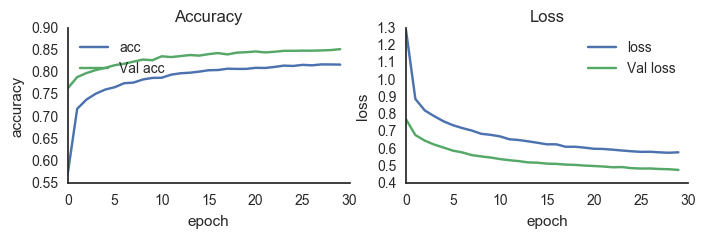

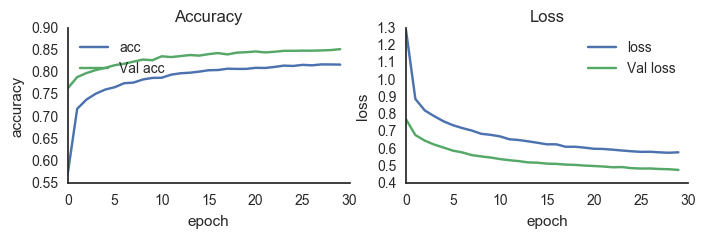

In [35]:
plot_training_curves(history.history)

It trains faster, but is significantly less accurate (though still going up a bit -- haven't reached the limit). 